# Какво представлява производната?
Производна на функцията $f(x)$ може да бъде дефинирана по следния начин:

$$
f'(x) = \lim _{\Delta x \to 0} \frac {f(x + \Delta x) - f(x)} {\Delta x}
$$

### Приближения на производна
Тази дефиниция не може да се реализира в компютърната аритметика, тъй като паметта на всеки компютър е ограничена и това налага определени лимитации от гледна точка на броя значещи цифри след десетичната запетая, с които се представя дадено реално число. Следователно ние можем да направим следното приближение:

$$
f'(x) \approx \frac {f(x + \Delta x) - f(x)} {\Delta x}
$$

Ако формално положим $\Delta x = - \Delta y$, то ще получим друго подобно приближение:
$$
f'(x) \approx \frac {f(x + \Delta x) - f(x)} {\Delta x} = \frac {f(x - \Delta y) - f(x)} {- \Delta y} = \frac {f(x) - f(x - \Delta y)} {\Delta y}
$$
$$
\implies f'(x) \approx \frac {f(x) - f(x - \Delta x)} {\Delta x}
$$

Ако съберем двата израза ще получим:
$$
f'(x) \approx \frac {f(x + \Delta x) - f(x - \Delta x)} {2 \Delta x}
$$

### Визуализация на методите за приближение на производна
В следващите няколко графики може да видите разликите в точността и да сравните грешката, която се допуска в следствие на направеното приближение, в зависимост от използвания метод и стойността на $\Delta x$. Ще работим с функцията $f(x) = e^x$, чиято производна има същия вид - $f'(x) = e^x$.

In [1]:
from typing import List, Callable
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt

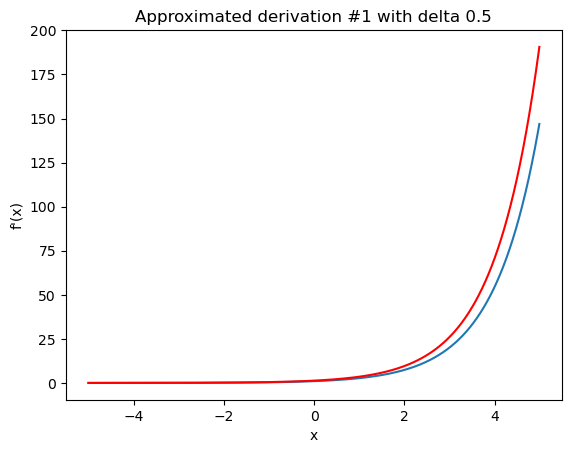

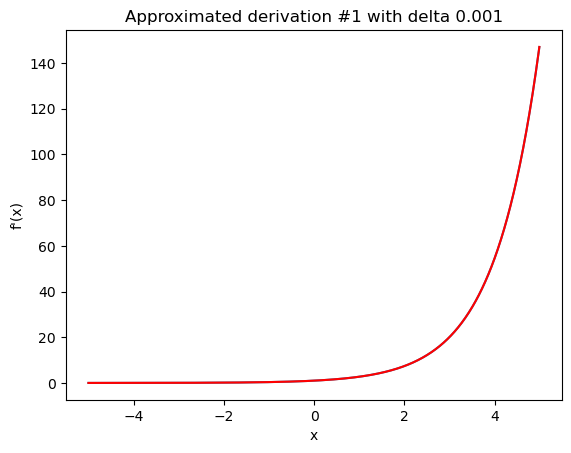

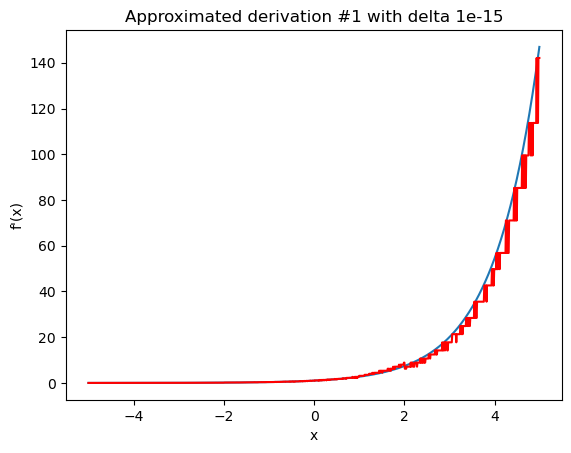

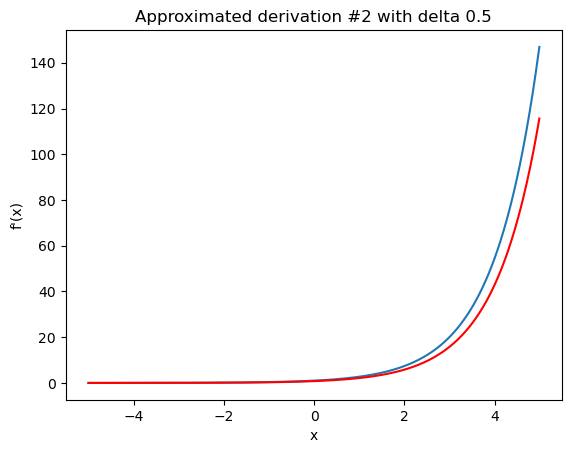

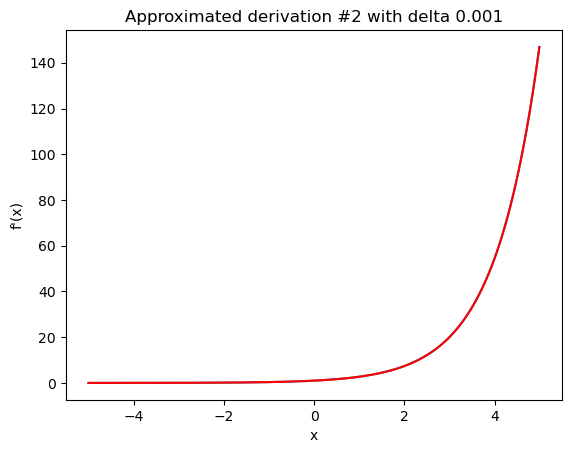

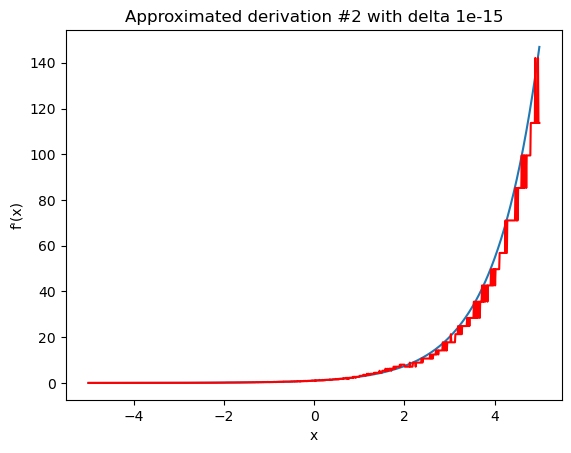

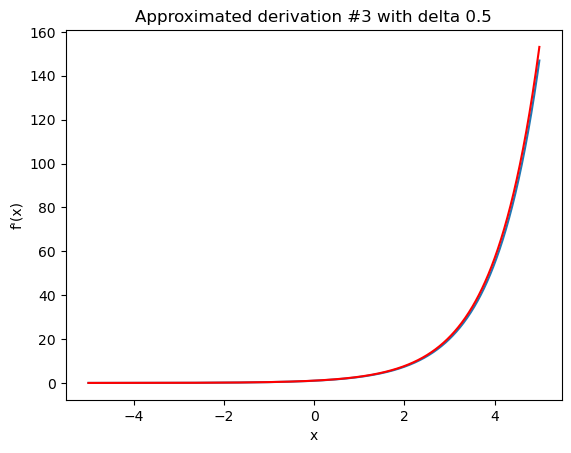

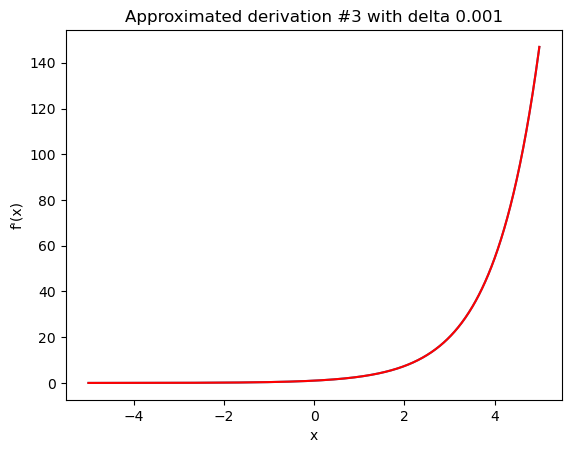

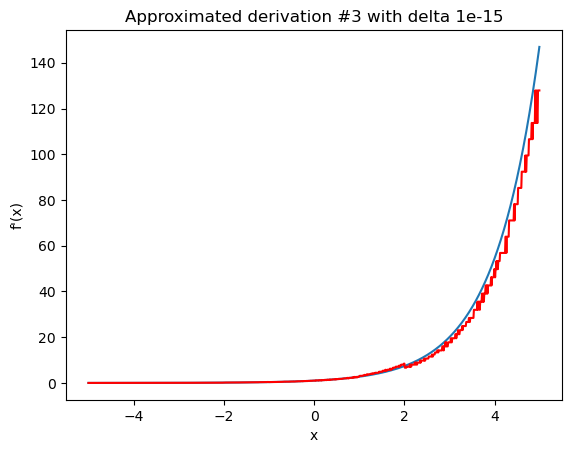

In [2]:
nodes = np.arange(-5, 5, 0.01)


def f1(num: int) -> float:
    return np.exp(num)


def approximated_derivation_1(num: float, delta: float) -> float:
    return (np.exp(num + delta) - np.exp(num)) / delta


def approximated_derivation_2(num: float, delta: float) -> float:
    return (np.exp(num) - np.exp(num - delta)) / delta


def approximated_derivation_3(num: float, delta: float) -> float:
    return (np.exp(num + delta) - np.exp(num - delta)) / (2 * delta)


def print_derivation_info(deltas: List[int], derivations: List[Callable[[float, float], float]]) -> None:
    for i in range(len(derivations)):
        current_derivation = derivations[i]

        for j in range(len(deltas)):
            current_delta = deltas[j]

            plt.title(f'Approximated derivation #{i + 1} with delta {current_delta}')
            plt.xlabel('x')
            plt.ylabel("f'(x)")
            plt.plot(nodes, [f1(p) for p in nodes], nodes, [current_derivation(p, current_delta) for p in nodes], 'r')
            plt.show()


all_deltas = [0.5, 10 ** -3, 10 ** -15]
all_derivations = [approximated_derivation_1, approximated_derivation_2, approximated_derivation_3]
print_derivation_info(all_deltas, all_derivations)


### Анализиране на резултатите

От дефиницията за производна следва, че при намаляване на $\Delta x$ приближението, което получаваме, трябва да бъде по-добро (от дефиницията имаме $\Delta x \to 0$). И наистина - намаляването на грешката се вижда ясно в първите две графики за всеки един от методите на приближение на производната, които сме използвали. При $\Delta x = 10^{-15}$ обаче получената апроксимация не е добра.

Този експеримент нагледно показва това, което бе описано по-рано - тъй като реалните числа в паметта на компютъра се представят с ограничен брой значещи цифри, грешката първоначално ще намалява при намаляване на стъпката, но когато бъде достигнат максимума на машинната точност (и следователно намаляването на стъпката няма повече да подобрява точността на същата тази апроксимация), грешката ще започне да расте заради увеличаването броя на операциите. Това е причината за появата на "шума" на третата графика за всеки един от методите на приближение на производната, които сме използвали.

# Какво представлява численото диференциране?
Численото диференциране ни помага да решаваме практически задачи от този вид: _"Да се намери производна на функцията $f$ в определена точка, като стойностите на функцията са известни само в краен брой точки."_ Също така техниките на численото диференциране са приложими и за функции със сложен аналитичен характер, за които не е оправдано точното пресмятане на производна.

Обикновено решението на подобни задачи представлява намирането на производна на някоя приближаваща функция (като за целта могат да бъдат използвани и интерполационните полиноми. Това, което трябва да се вземе предвид обаче, е, че дори малки изменения на приближаващата функция могат да доведат до по-големи изменения в производната. Нека разгледаме конкретен пример:

$$
f(x) - P(x) = -10^{-5}\sin(mx)
$$

Тук отклонението на приближаващия полином $P(x)$ спрямо функцията $f(x)$ е $R(x) = -10^{-5}\sin(mx)$. Очевидно е, че $|R(x)| \leq 10^{-5}$. Нека обаче да видим какво ще се случи, ако диференцираме двете части на това уравнение:

$$
f'(x)-P'(x) = -m10^{-5}\cos(mx)
$$

Този път ясно се вижда, че грешката $R'(x) = -m10^{-5}\cos(mx)$ може да бъде произволно голяма в зависимост от избраната стойност за параметъра $m$. Следва да заключим, че задачата за числено диференциране не е устойчива.

### Числено диференциране чрез _Интерполационния полином на Нютон_

Нека въведем следните означения:
$$
\omega_n(x) = (x - x_0)(x - x_1)\dots(x - x_n)
$$
$$
f_{[x_i,x_{i+1},\dots,x_{i+k+1}]} = \frac {f_{[x_{i+1},x_{i+2},\dots,x_{i+k+1}]} - f_{[x_i,x_{i+1},\dots,x_{i+k}]}} {x_{i+k+1}-x_{i}}
$$

Производната на функцията $\omega_n$ има едно чудесно свойство, което ще използваме в някои означения по-напред:
$$
\omega_n'(x) = (x - x_1)(x - x_2)\dots(x - x_n) + (x - x_0)(x - x_2)\dots(x - x_n) + \dots + (x - x_0)(x - x_1)\dots(x - x_{n-1}) = \sum_{i=0}^{n} \prod_{j \neq i}^{n} (x - x_j)
$$
$$
\omega_n'(x_k) = (x_k - x_0)(x_k - x_1)\dots(x_k - x_{k-1})(x_k - x_{k+1})\dots(x_k - x_n)
$$

Тогава от формулата за представяне на грешка с разделена разлика получаваме:
$$
f(x) = N_n(f;x) + f_{[x_0,x_1,\dots,x_n,x]}\omega_n(x)
$$
$$
f'(x) = N_n'(f;x) + \frac {df_{[x_0,x_1,\dots,x_n,x]}} {dx} \omega_n(x) + f_{[x_0,x_1,\dots,x_n,x]} \omega_n'(x)
$$

От дефиницията за производна знаем, че:
$$
\frac {df_{[x_0,x_1,\dots,x_n,x]}} {dx} = \lim_{\Delta x \to 0} \frac {f_{[x_0,x_1,\dots,x_n,x+\Delta x]} - f_{[x_0,x_1,\dots,x_n,x]}} {\Delta x}
$$

За да продължим с по-нататъшното решение на този израз, е необходимо да отбележим едно свойство на разделените разлики, а именно - симетричността им. Ако имаме пермутацията $\sigma : {0,\dots,n} \rightarrow {0,\dots,n}$, то $f_{[x_0,x_1,\dots,x_n]} = f_{[x_{\sigma(0)},x_{\sigma(1)},\dots,x_{\sigma(n)}]}$. Сега можем да се върнем към предишния израз:
$$
\lim_{\Delta x \to 0} \frac {f_{[x_0,x_1,\dots,x_n,x+\Delta x]} - f_{[x_0,x_1,\dots,x_n,x]}} {\Delta x} = \lim_{\Delta x \to 0} f_{[x_0,x_1,\dots,x_n,x,x + \Delta x]} = f_{[x_0,x_1,\dots,x_n,x,x]}
$$

След като знаем как се диференцират разделени разлики, нека се върнем обратно към изчисляването на производната за $f$:
$$
f'(x) = N_n'(f;x) + f_{[x_0,x_1,\dots,x_n,x,x]} \omega_n(x) + f_{[x_0,x_1,\dots,x_n,x]} \omega_n'(x)
$$

Освен това, ако $f \in C^{n+2}[a,b], a \le x_o < x_1 < \dots < x_n \le b, x \in [a,b]$, то тогава можем да опростим записа, като представим разделената разлика чрез производна на $f$ в дадена точка:
$$
f_{[x_0,x_1,\dots,x_k]} = \frac {f^{(k)}(\xi)} {k!}
$$
$$
\implies f'(x) = N_n'(f;x) + \frac {f^{(n+2)}(\xi)} {(n+2)!} \omega_n(x) + \frac {f^{(n+1)}(\eta)} {(n+1)!} \omega_n'(x),
$$
където $\xi$ и $\eta$ са точки от интервала $(a, b)$.

От това уравнение можем да заключим, че грешката при приближаване на $f'(x)$ с $N_n'(f;x)$ е:
$$
R'(x) = \frac {f^{(n+2)}(\xi)} {(n+2)!} \omega_n(x) + \frac {f^{(n+1)}(\eta)} {(n+1)!} \omega_n'(x)
$$

Ако направим следните означение - $M_{n+2} = max_{x \in [a,b]}|f^{(n+2)}(x)|$ и $M_{n+1} = max_{x \in [a,b]}|f^{(n+1)}(x)|$, окончателно получаваме:
$$
|R'(x)| = \frac {|f^{(n+2)}(\xi)|} {(n+2)!} |\omega_n(x)| + \frac {|f^{(n+1)}(\eta)|} {(n+1)!} |\omega_n'(x)| \le \frac {M_{n+2}} {(n + 2)!} |\omega_n(x)| + \frac {M_{n+1}} {(n + 1)!} |\omega_n'(x)|
$$

Нека намерим производната на _Интерполационния полином на Нютон_:
$$
N_n(f; x) = f(x_0) + f_{[x_0, x_1]}(x - x_0) + f_{[x_0, x_1, x_2]}(x - x_0)(x - x_1) + \dots + f_{[x_0, x_1, \dots, x_n]}(x - x_0)(x - x_1) \dots (x - x_{n-1})
$$
$$
N_n'(f; x) = f_{[x_0, x_1]} + f_{[x_0, x_1, x_2]}[(x - x_0) + (x - x_1)] + f_{[x_0, x_1, x_2, x_3]}[(x - x_0)(x - x_1) + (x - x_0)(x - x_2) + (x - x_1)(x - x_2)] + \dots + f_{[x_0, x_1, \dots, x_n]} \sum_{i=0}^{n-1} \prod_{j \neq i}^{n-1} (x - x_j)
$$

Този израз е доста комплексен, но лесно може да покажем, че той ще се опрости, когато $x$ приема за стойност някой от интерполационните възли. Нека разгледаме например случая, когато $x = x_0$:
$$
N_n'(f; x) = f_{[x_0, x_1]} + f_{[x_0, x_1, x_2]}(x_0 - x_1) + f_{[x_0, x_1, x_2, x_3]}(x_0 - x_1)(x_0 - x_2) + \dots + f_{[x_0, x_1, \dots, x_n]}(x_0 - x_1)(x_0 - x_2)\dots(x_0 - x_{n-1})
$$

In [3]:
# This cell will contain helper functions used along the way.
def extract_single_dimension(data: List[tuple[float, float]], dimension: int) -> List[float]:
    return [d[dimension] for d in data]


def calculate_divided_differences(data: List[tuple[float, float]]) -> List[List[float]]:
    ans = [[] for _ in range(len(data))]
    for i in range(len(data)):
        ans[0].append(data[i][1])

    for k in range(len(data) - 1):
        for i in range(len(ans[k]) - 1):
            numerator = ans[k][i + 1] - ans[k][i]
            denominator = data[i + k + 1][0] - data[i][0]

            if numerator == 0 or denominator == 0:
                ans[k + 1].append(0)
            else:
                ans[k + 1].append(numerator / denominator)

    return ans


def generate_func_data(x_points: List[float], f: Callable[[float], float]) -> List[tuple[float, float]]:
    ans = []

    for i in range(len(x_points)):
        ans.append((x_points[i], f(x_points[i])))

    return ans


def prepare_plot(title: str, x_label: str, y_label: str) -> None:
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(axis='both')

def print_divided_differences(divided_differences: List[List[float]]) -> None:
    for i in range(1, len(divided_differences)):
        print()
        print(f'#{i + 1}')
        for j in range(len(divided_differences[i])):
            notation = ", ".join([f'x[{p}]' for p in range(j, i + j + 1)])
            print(f'f[{notation}] = {divided_differences[i][j]}')


def print_interpolation_nodes(data: List[tuple[float, float]]) -> None:
    for i in range(len(data)):
        print(f'x[{i}] = {data[i][0]}, f(x[{i}]) = {data[i][1]}')


def calculate_chebyshev_nodes(n: int, a: float, b: float) -> List[float]:
    ans = []

    for i in range(n):
        current_node = 0.5 * (a + b) + 0.5 * (b - a) * np.cos(((2 * i + 1) / (2 * n)) * np.pi)
        ans.append(current_node)

    return ans


def interpolate_newton(x: float, data: List[tuple[float, float]], divided_differences: List[List[float]]) -> float:
    ans = 0

    for i in range(len(divided_differences)):
        c = divided_differences[i][0]

        for j in range(i):
            c *= x - data[j][0]

        ans += c

    return ans


def visualize_newton_interpolation(data: List[tuple[float, float]], f: Callable[[float], float] = None,
                                   f_deriv: Callable[[float], float] = None, is_verbose: bool = False) -> None:
    if is_verbose:
        print_interpolation_nodes(data)

    divided_differences = calculate_divided_differences(data)
    if is_verbose:
        print_divided_differences(divided_differences)

    x_coordinates = extract_single_dimension(data, 0)
    y_coordinates = extract_single_dimension(data, 1)

    def interpolate_in_point(p: float) -> float:
        return interpolate_newton(p, data, divided_differences)

    step = 0.01
    all_points_in_range = np.arange(min(x_coordinates), max(x_coordinates) + step, step)

    interpolation_values = [interpolate_in_point(p) for p in all_points_in_range]
    interpolation_errors = None

    interpolation_deriv_values = [derivative(interpolate_in_point, p, dx=10 ** -5) for p in
                                  all_points_in_range]
    interpolation_deriv_errors = None

    prepare_plot('Graph of the interpolated function', 'x', 'f(x)')
    if f:
        f_values = [f(p) for p in all_points_in_range]
        interpolation_errors = [v1 - v2 for v1, v2 in zip(f_values, interpolation_values)]
        plt.plot(all_points_in_range, f_values, color='orange', linewidth=2, label="Original")

    plt.plot(all_points_in_range, interpolation_values, label="Interpolated")
    plt.plot(x_coordinates, y_coordinates, marker='o', markersize=3, linewidth=0, color='r',
             label="Interpolation nodes")

    plt.legend()
    plt.show()

    if interpolation_errors is not None:
        prepare_plot('Graph of the interpolation error', 'x', 'R(x)')
        plt.plot(all_points_in_range, interpolation_errors, linewidth=1)
        plt.show()

    prepare_plot('Graph of the interpolated function\'s derivative', 'x', 'f\'(x)')
    if f_deriv:
        f_deriv_values = [f_deriv(p) for p in all_points_in_range]
        interpolation_deriv_errors = [v1 - v2 for v1, v2 in zip(f_deriv_values, interpolation_deriv_values)]
        plt.plot(all_points_in_range, f_deriv_values, color='orange', linewidth=2, label="Original")

    plt.plot(all_points_in_range, interpolation_deriv_values, label="Interpolated")

    plt.legend()
    plt.show()

    if interpolation_errors is not None:
        prepare_plot('Graph of the interpolation derivative error', 'x', 'R\'(x)')
        plt.plot(all_points_in_range, interpolation_deriv_errors, linewidth=1)
        plt.show()

# Примери

В следващите редове ще представя няколко примера, които да можем да разгледаме и да анализираме заедно.

### Диференциране на таблично зададена функция

Нека разгледаме таблично зададената функция $f$:

| x   | y   |
|-----|-----|
| -2  | 29  |
| -1  | -6  |
| 1   | -4  |
| 2   | -3  |
| 3   | 14  |

x[0] = -2, f(x[0]) = 29
x[1] = -1, f(x[1]) = -6
x[2] = 1, f(x[2]) = -4
x[3] = 2, f(x[3]) = -3
x[4] = 3, f(x[4]) = 14

#2
f[x[0], x[1]] = -35.0
f[x[1], x[2]] = 1.0
f[x[2], x[3]] = 1.0
f[x[3], x[4]] = 17.0

#3
f[x[0], x[1], x[2]] = 12.0
f[x[1], x[2], x[3]] = 0
f[x[2], x[3], x[4]] = 8.0

#4
f[x[0], x[1], x[2], x[3]] = -3.0
f[x[1], x[2], x[3], x[4]] = 2.0

#5
f[x[0], x[1], x[2], x[3], x[4]] = 1.0


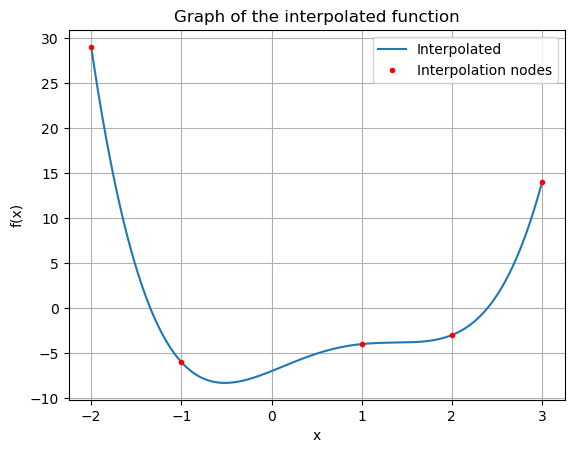

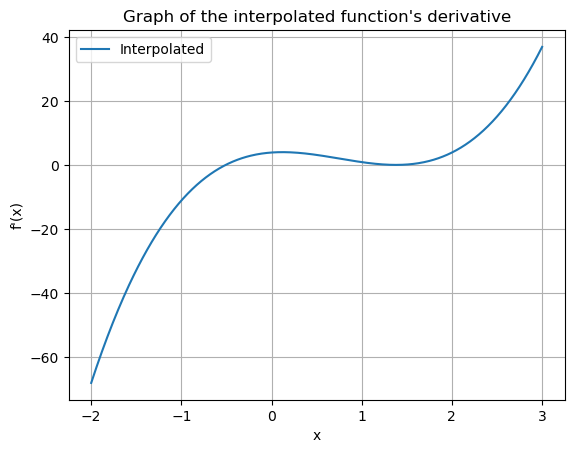

In [4]:
visualize_newton_interpolation([(-2, 29), (-1, -6), (1, -4), (2, -3), (3, 14)], is_verbose=True)

### Анализиране на грешката при диференциране

Да започнем с един изключително лесен пример: $f(x) = sin(x) + cos(x)$. Примерният код ще построи Интерполационен полином на Нютон от 10-та степен, а за интерполационни възли се използват нулите на Полинома на Чебишов в диапазона $[0, 10]$. От получените резултати ще забележим, че грешката при интерполиране на $f(x)$ и грешката при приближаване на $f'(x)$ са по-скоро минимални.

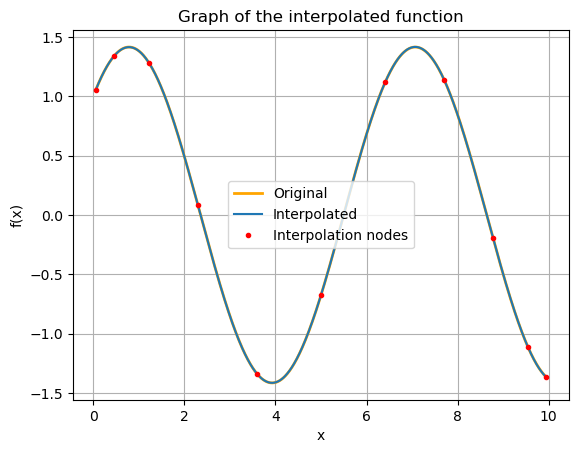

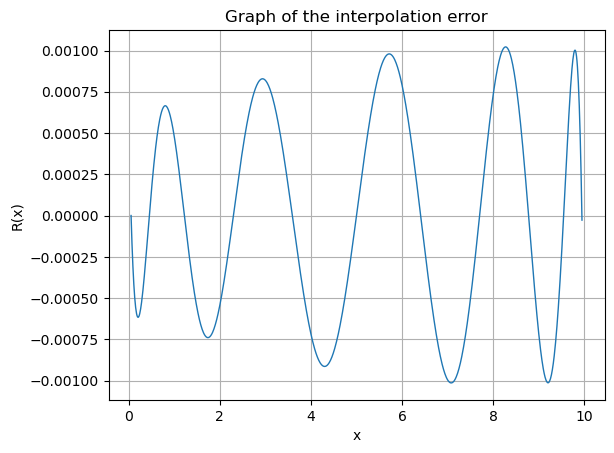

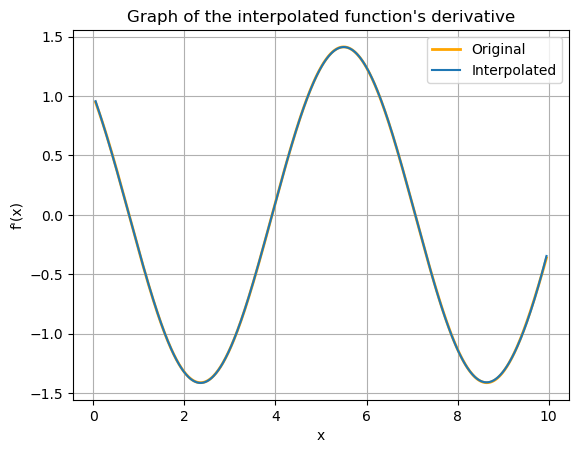

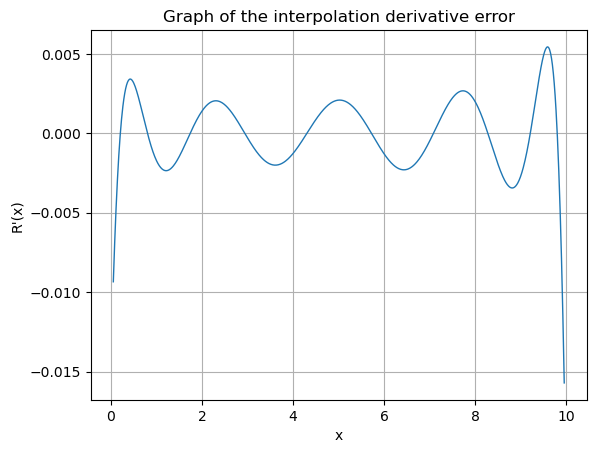

In [5]:
def f2(x: float):
    return np.sin(x) + np.cos(x)


def f2_deriv(x: float):
    return np.cos(x) - np.sin(x)


f2_data = generate_func_data(calculate_chebyshev_nodes(11, 0, 10), f2)
visualize_newton_interpolation(f2_data, f2, f2_deriv)